In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
water_quality=pd.read_csv('water_potability.csv')
water_quality.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [28]:
for i in list(water_quality.columns)[0:]:
    print(f'Value Counts for {i} : ',water_quality[i].value_counts(),sep="\n")

Value Counts for ph : 
7.036752     492
5.481484     400
10.258615     75
9.419510       1
9.149127       1
            ... 
9.778182       1
7.793915       1
7.058183       1
7.890354       1
7.874671       1
Name: ph, Length: 2312, dtype: int64
Value Counts for Hardness : 
156.942079    364
276.392834     39
241.135975      1
177.712217      1
237.022863      1
             ... 
177.846244      1
231.351576      1
194.738282      1
168.098935      1
195.102299      1
Name: Hardness, Length: 2875, dtype: int64
Value Counts for Solids : 
9833.654382     187
44831.869873     47
20791.318981      1
19126.298537      1
15979.334793      1
               ... 
11930.624795      1
22389.380486      1
22113.391452      1
40588.433831      1
17404.177061      1
Name: Solids, Length: 3044, dtype: int64
Value Counts for Chloramines : 
5.133688     313
11.096086     30
7.300212       1
7.017578       1
5.527299       1
            ... 
7.868036       1
10.087062      1
8.556396       1
7.773484  

#### Missing value is in ph, Sulfate, Trihalomethanes. 

# Handling Missing Values

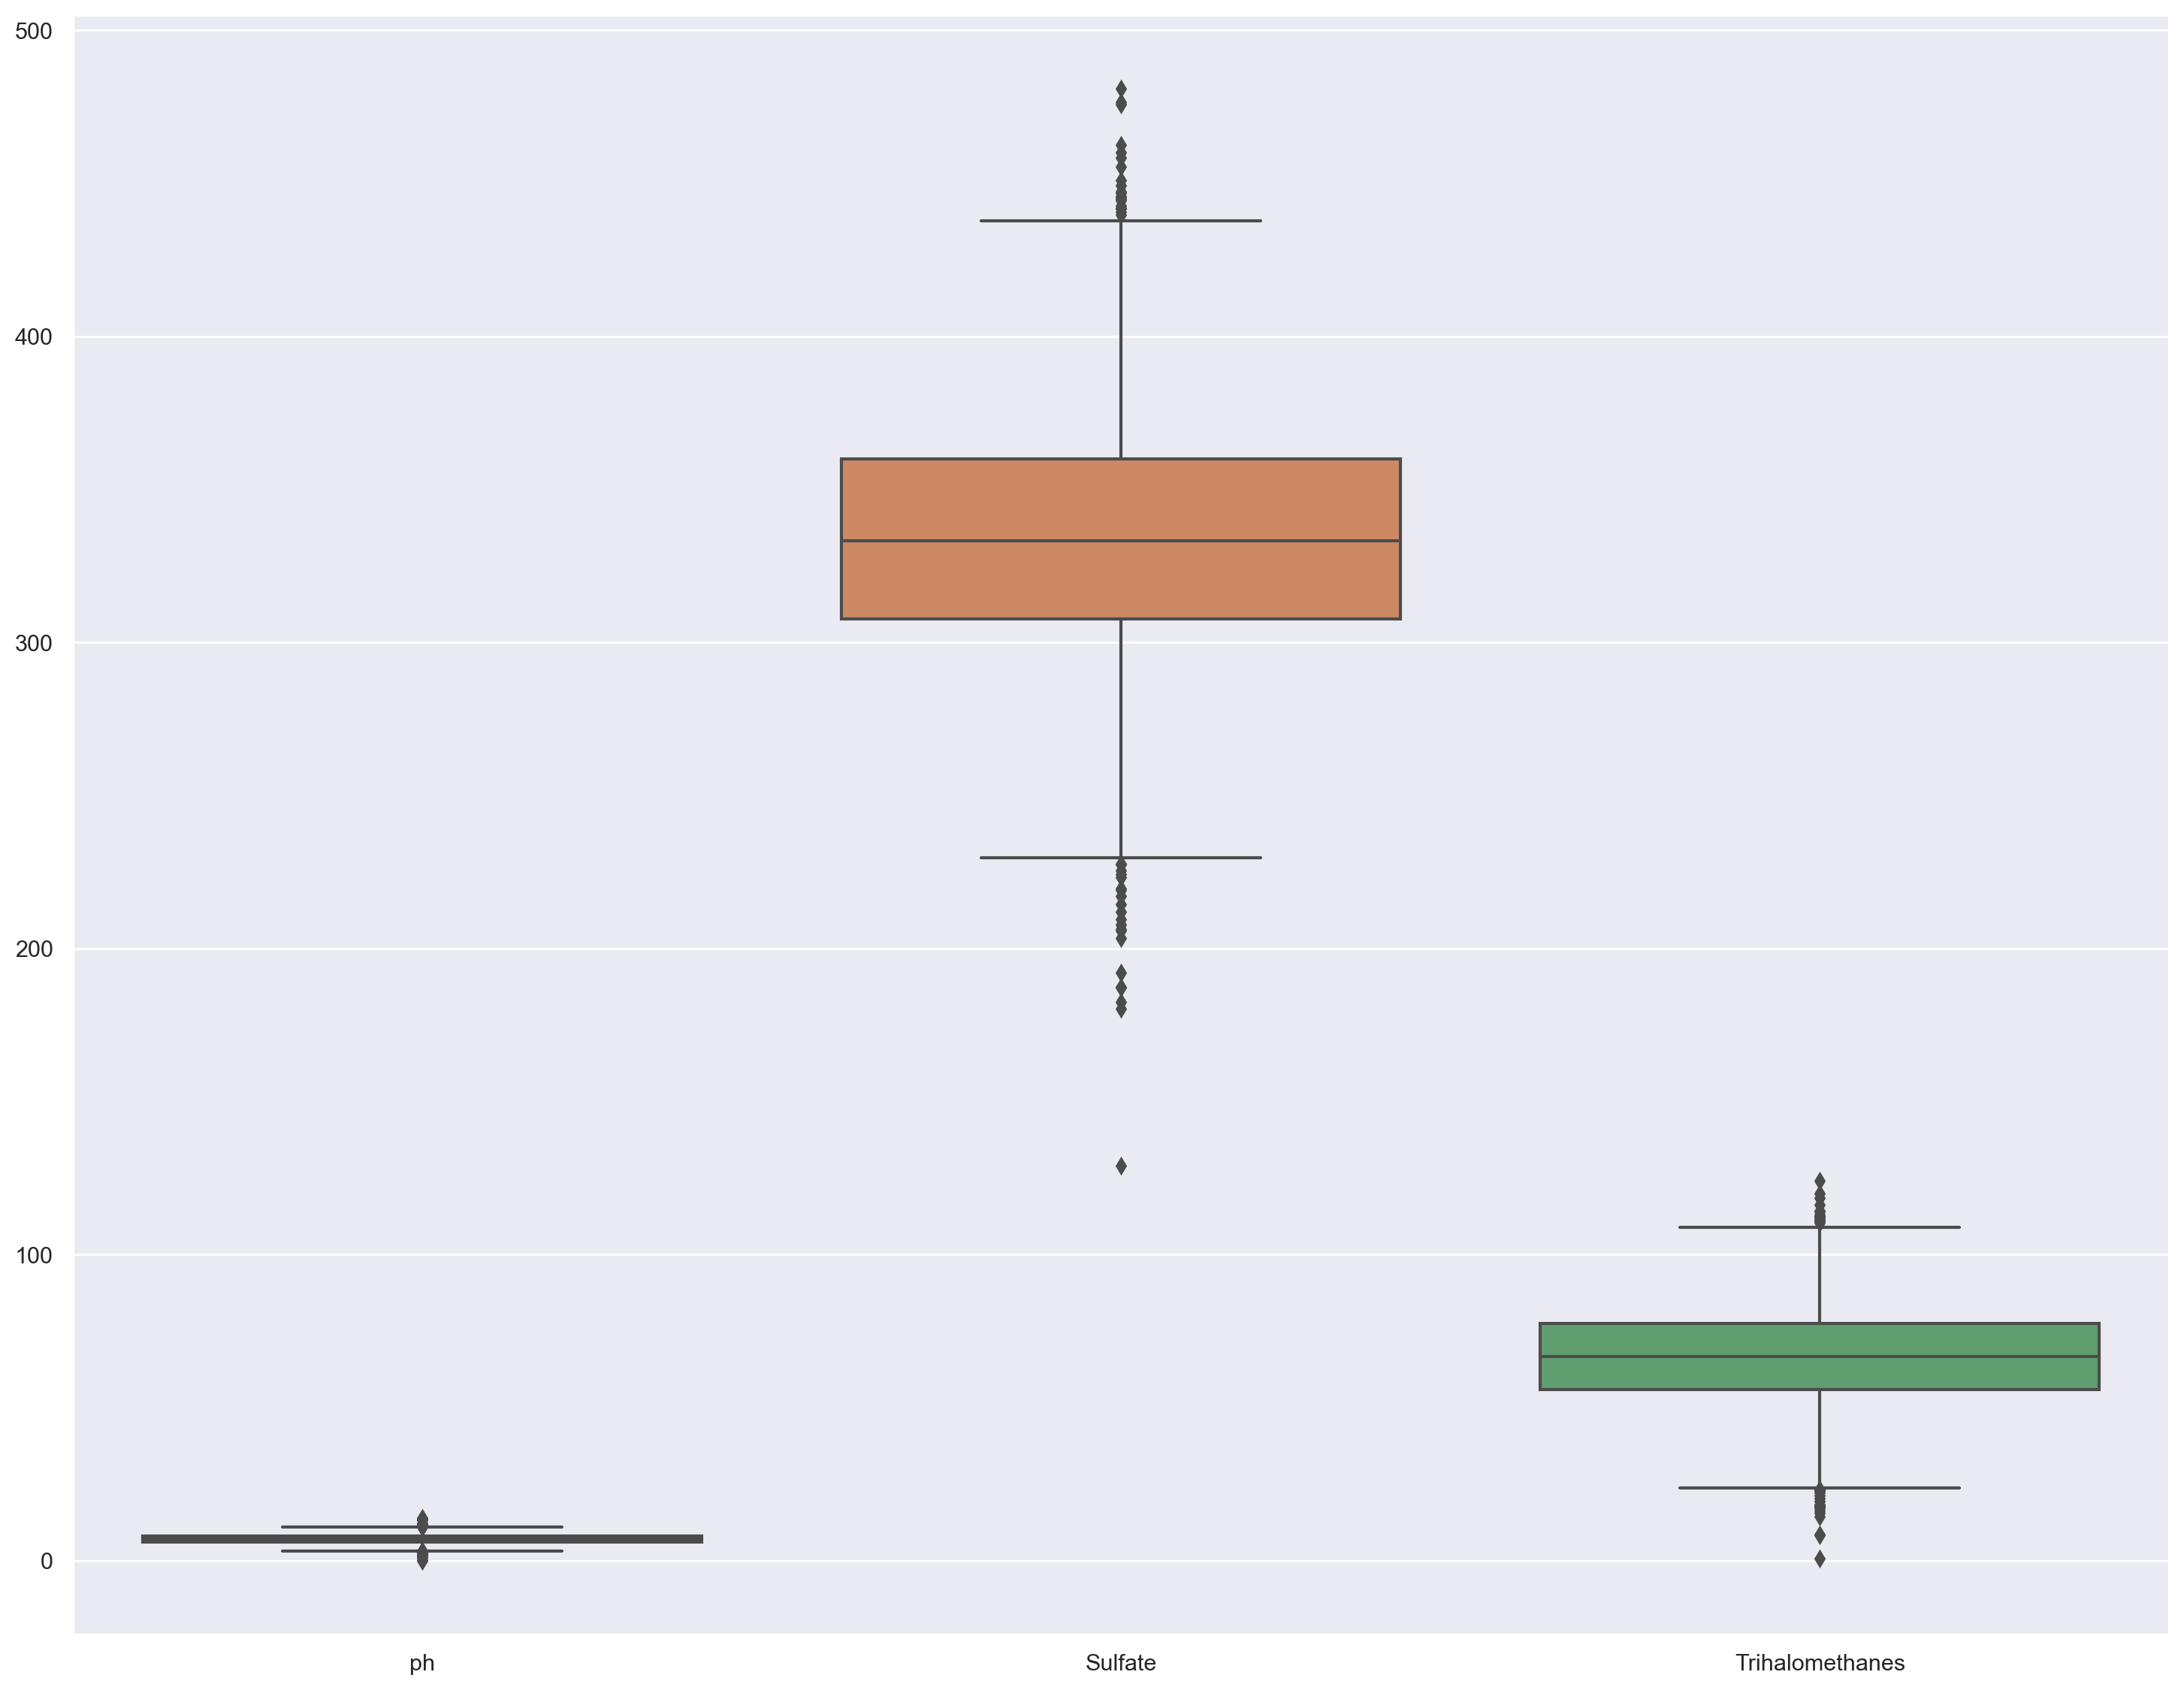

In [4]:
plt.figure(figsize=(18,14),dpi=200)
sns.boxplot(data=water_quality[['ph','Sulfate','Trihalomethanes']])
plt.show()


#### Since all the three has outlier. Therefore median will be used for missing value

In [5]:
def treat_miss_value(x):
    med=x.median()
    x=x.fillna(med,inplace=True)
   
    

In [6]:
treat_miss_value(water_quality['ph'])

In [7]:
treat_miss_value(water_quality['Sulfate'])

In [8]:
treat_miss_value(water_quality['Trihalomethanes'])

In [9]:
water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Handling Outlier

In [10]:
def plot_outlier(x):
    sns.boxplot(x)
    plt.show()
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+IQR*1.5
    lower_limit=Q3-IQR*1.5
    print('Q1',Q1)
    print('Q3',Q3)
    print('IQR',IQR)
    print('upper_limit',upper_limit)
    print('lower_limit',lower_limit)
    

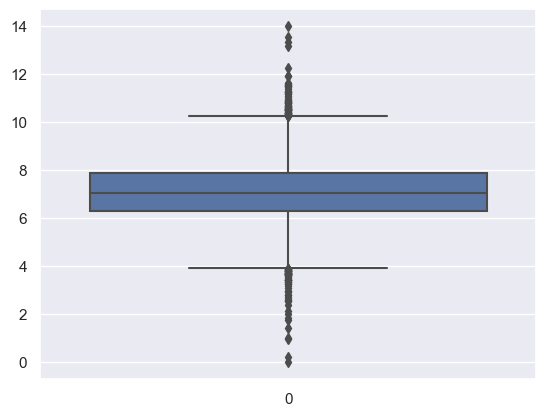

Q1 6.277672635884397
Q3 7.870049755247176
IQR 1.5923771193627791
upper_limit 10.258615434291345
lower_limit 5.481484076203007


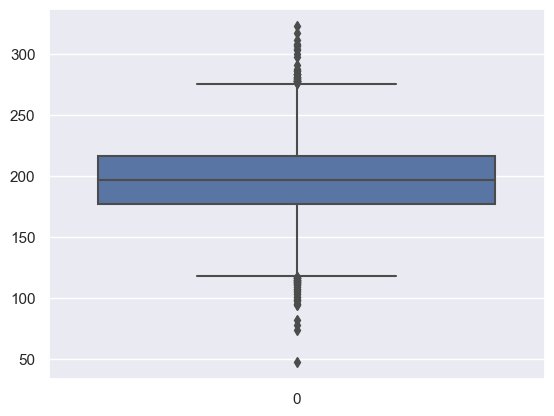

Q1 176.85053787752437
Q3 216.66745621487073
IQR 39.81691833734635
upper_limit 276.3928337208903
lower_limit 156.9420787088512


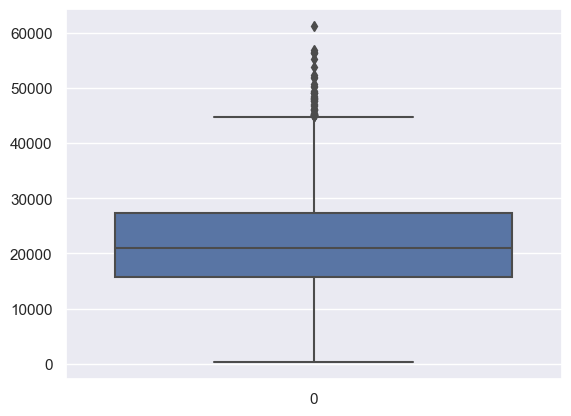

Q1 15666.69029696465
Q3 27332.762127438615
IQR 11666.071830473964
upper_limit 44831.86987314956
lower_limit 9833.654381727669


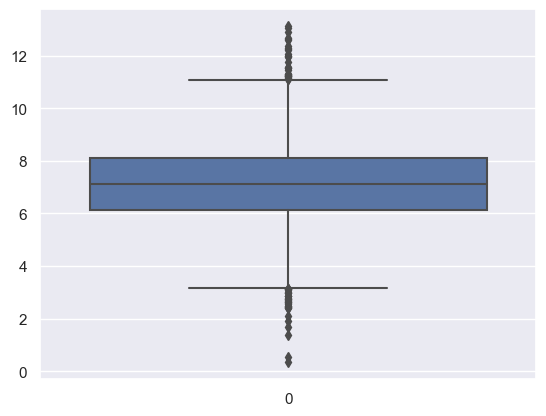

Q1 6.1274207554913
Q3 8.114887032109028
IQR 1.9874662766177282
upper_limit 11.09608644703562
lower_limit 5.133687617182435


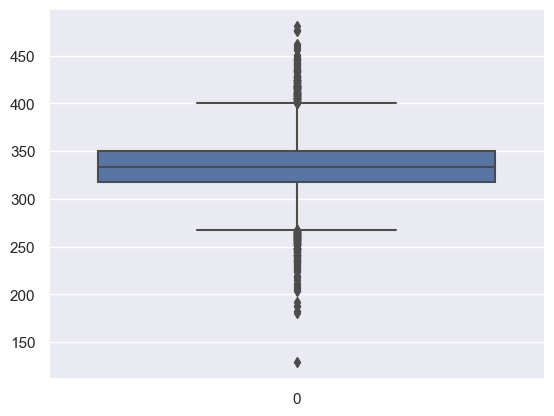

Q1 317.0946377261117
Q3 350.38575630240354
IQR 33.29111857629181
upper_limit 400.3224341668413
lower_limit 300.4490784379658


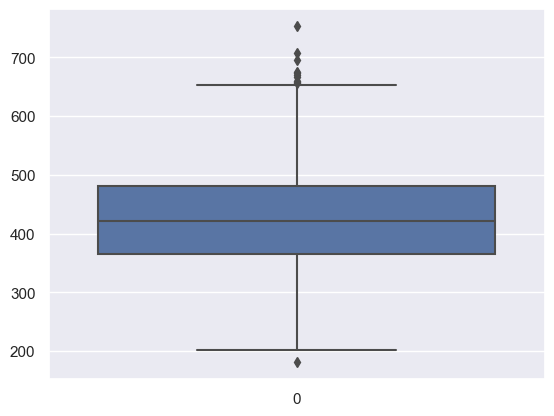

Q1 365.7344141184627
Q3 481.7923044877282
IQR 116.05789036926546
upper_limit 655.8791400416264
lower_limit 307.70546893383


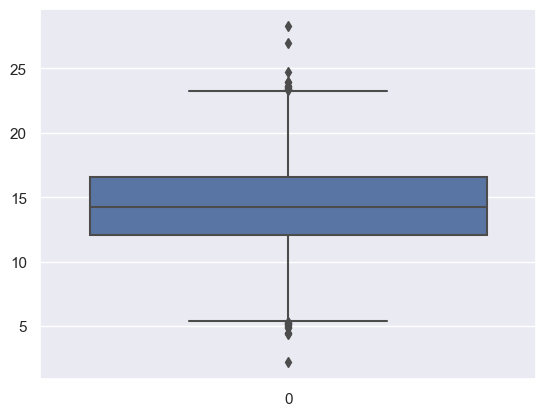

Q1 12.065801333613067
Q3 16.557651543843434
IQR 4.491850210230368
upper_limit 23.295426859188986
lower_limit 9.819876228497883


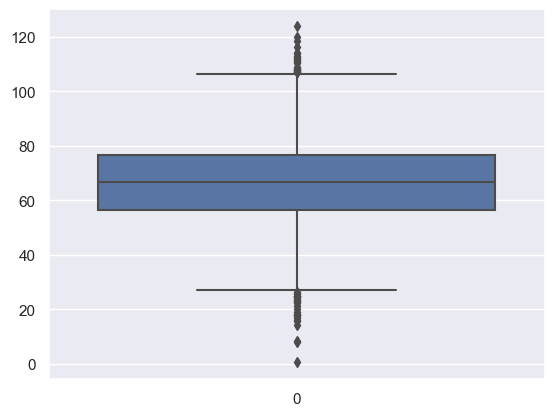

Q1 56.64765567150501
Q3 76.66660934716015
IQR 20.01895367565514
upper_limit 106.69503986064285
lower_limit 46.638178833677436


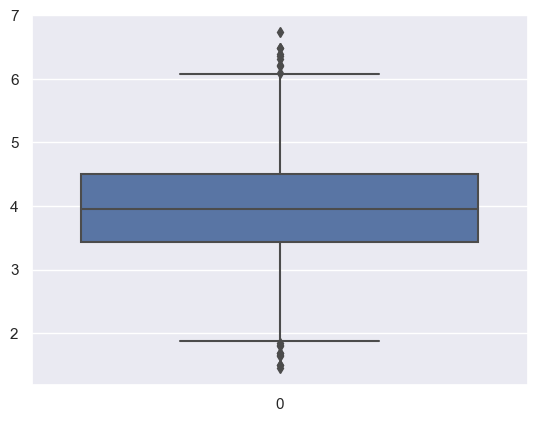

Q1 3.439710869612912
Q3 4.50031978728511
IQR 1.060608917672198
upper_limit 6.091233163793407
lower_limit 2.909406410776813


In [11]:
for i in list(water_quality.columns)[0:-1]:
    plot_outlier(water_quality[i])

In [12]:
water_quality['ph']=np.where((water_quality['ph']>10.258615434291345),10.258615434291345,
                             np.where((water_quality['ph']<5.481484076203007),5.481484076203007,water_quality['ph']))

In [13]:
water_quality['Hardness']=np.where((water_quality['Hardness']>276.3928337208903),276.3928337208903,
        np.where((water_quality['Hardness']<156.9420787088512),156.9420787088512,water_quality['Hardness']))

In [14]:
water_quality['Solids']=np.where((water_quality['Solids']>44831.86987314956),44831.86987314956,
                                np.where((water_quality['Solids']<9833.654381727669),9833.654381727669,water_quality['Solids']))

In [15]:
water_quality['Chloramines']=np.where((water_quality['Chloramines']>11.09608644703562),11.09608644703562,
                                     np.where((water_quality['Chloramines']<5.133687617182435),5.133687617182435,water_quality['Chloramines']))

In [16]:
water_quality['Sulfate']=np.where((water_quality['Sulfate']>400.3224341668413),400.3224341668413,
                                     np.where((water_quality['Sulfate']<300.4490784379658),300.4490784379658,water_quality['Sulfate']))

In [17]:
water_quality['Conductivity']=np.where((water_quality['Conductivity']>655.8791400416264),655.8791400416264,
                                     np.where((water_quality['Conductivity']<307.70546893383),307.70546893383,water_quality['Conductivity']))

In [18]:
water_quality['Organic_carbon']=np.where((water_quality['Organic_carbon']>23.295426859188986),23.295426859188986,
                                     np.where((water_quality['Organic_carbon']<9.819876228497883),9.819876228497883,water_quality['Organic_carbon']))

In [19]:
water_quality['Trihalomethanes']=np.where((water_quality['Trihalomethanes']>106.69503986064285),106.69503986064285,
                                     np.where((water_quality['Trihalomethanes']<46.638178833677436),46.638178833677436,water_quality['Trihalomethanes']))

In [20]:
water_quality['Turbidity']=np.where((water_quality['Turbidity']>6.091233163793407),6.091233163793407,
                                     np.where((water_quality['Turbidity']<2.909406410776813),2.909406410776813,water_quality['Turbidity']))

In [21]:
def after_outlier_treatment(x):
    sns.boxplot(x)
    plt.show()

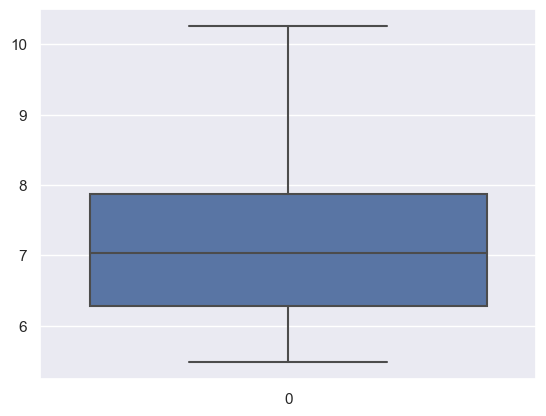

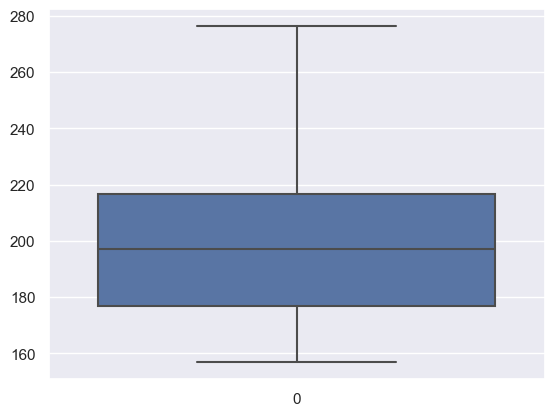

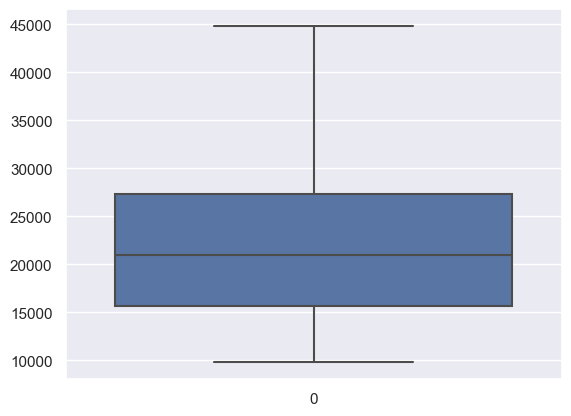

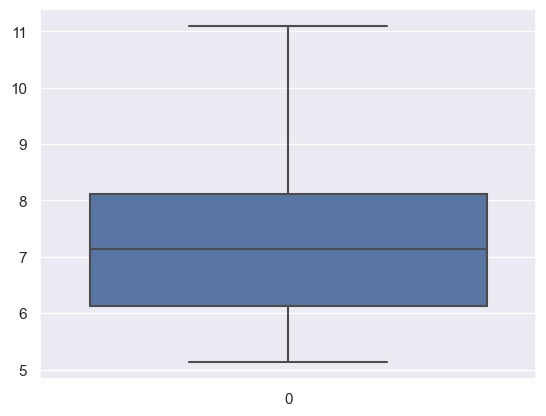

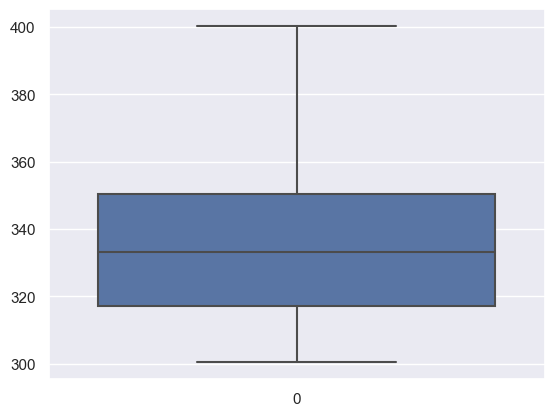

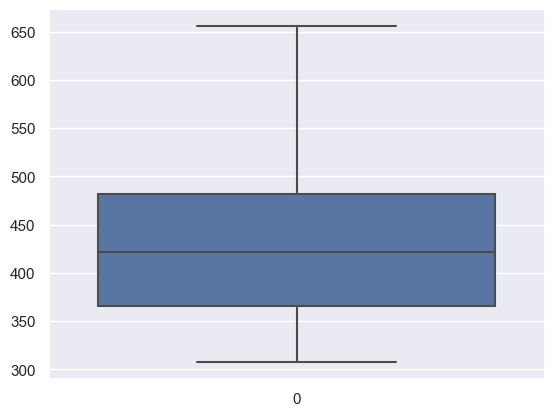

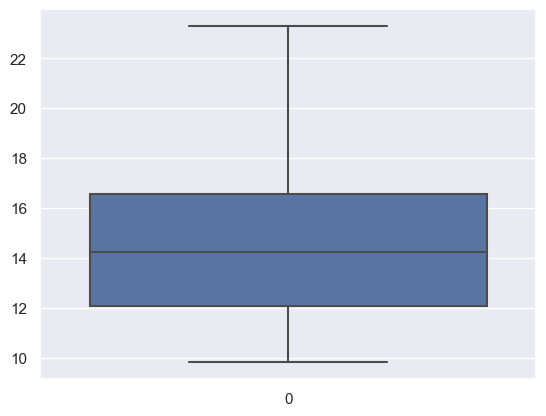

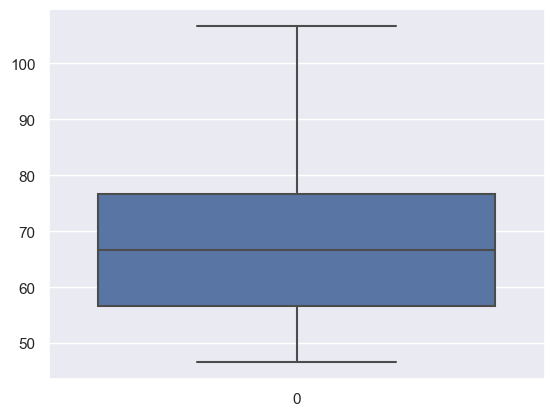

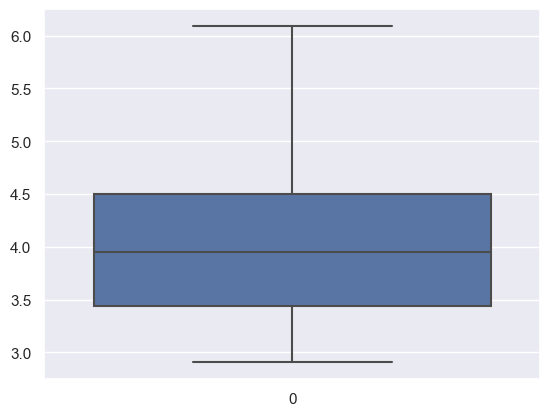

In [22]:
for i in list(water_quality.columns)[0:-1]:
    after_outlier_treatment(water_quality[i])

#### No outlier in any column

## For visualization in Tableau and Power BI exporting the data

In [26]:
water_quality.to_excel('Output.xlsx',index=False)

# Feature Scaling - for Independent features

In [25]:
x=water_quality.iloc[:,:-1]
y=water_quality.iloc[:,-1]

In [29]:
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=101)

In [31]:
col_name=x_train.columns

In [32]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler()
x_standard=x_std.fit_transform(x_train)

In [33]:
x_train=pd.DataFrame(x_standard,columns=col_name)

In [34]:
x_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-1.046473,-0.387309,1.763274,-1.465663,-1.315520,1.321311,-0.990341,0.703464,-0.483717
1,-0.678392,-1.397868,-0.818413,0.282743,0.227412,-1.206105,-1.520220,-1.490510,2.018454
2,-1.389406,-0.577322,0.426563,0.945559,-1.315520,-0.377231,-1.520220,-1.490510,0.223680
3,-0.102562,0.708871,-1.281716,-0.236891,2.078777,-1.556844,0.570780,-0.059927,-1.030467
4,-0.298970,1.433257,-1.463486,2.243749,2.353594,-0.712877,1.481422,-1.490510,-0.260711


# Imbalancing - for target features

In [35]:
y_train.value_counts()

0    1395
1     898
Name: Potability, dtype: int64

In [37]:
zero=(1395/(1395+898))*100
one=(898/(1395+898))*100
print(zero)
print(one)

60.837331007413866
39.16266899258613


#### since minority is not double of majority therefore we can say data is balanced.